In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = pd.read_csv("Iris.csv")  # Ensure the CSV file is in the same directory
iris.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
# Filter data for each species
setosa = iris[iris['Species'] == 'Iris-setosa']
versicolor = iris[iris['Species'] == 'Iris-versicolor']
virginica = iris[iris['Species'] == 'Iris-virginica']


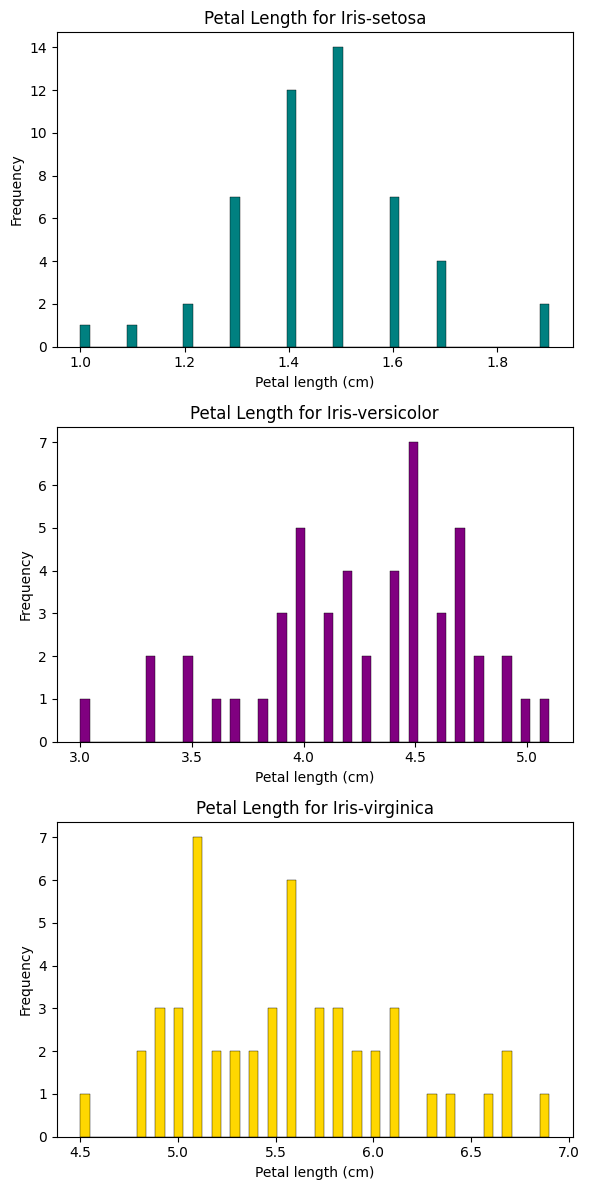

In [19]:
# Petal Length Histograms with thin lines
plt.figure(figsize=(6, 12))

plt.subplot(3, 1, 1)
plt.hist(setosa['PetalLengthCm'], bins=50, color='teal', edgecolor='black', linewidth=0.3)
plt.title('Petal Length for Iris-setosa')
plt.xlabel('Petal length (cm)')
plt.ylabel('Frequency')

plt.subplot(3, 1, 2)
plt.hist(versicolor['PetalLengthCm'], bins=50, color='purple', edgecolor='black', linewidth=0.3)
plt.title('Petal Length for Iris-versicolor')
plt.xlabel('Petal length (cm)')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
plt.hist(virginica['PetalLengthCm'], bins=50, color='gold', edgecolor='black', linewidth=0.3)
plt.title('Petal Length for Iris-virginica')
plt.xlabel('Petal length (cm)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


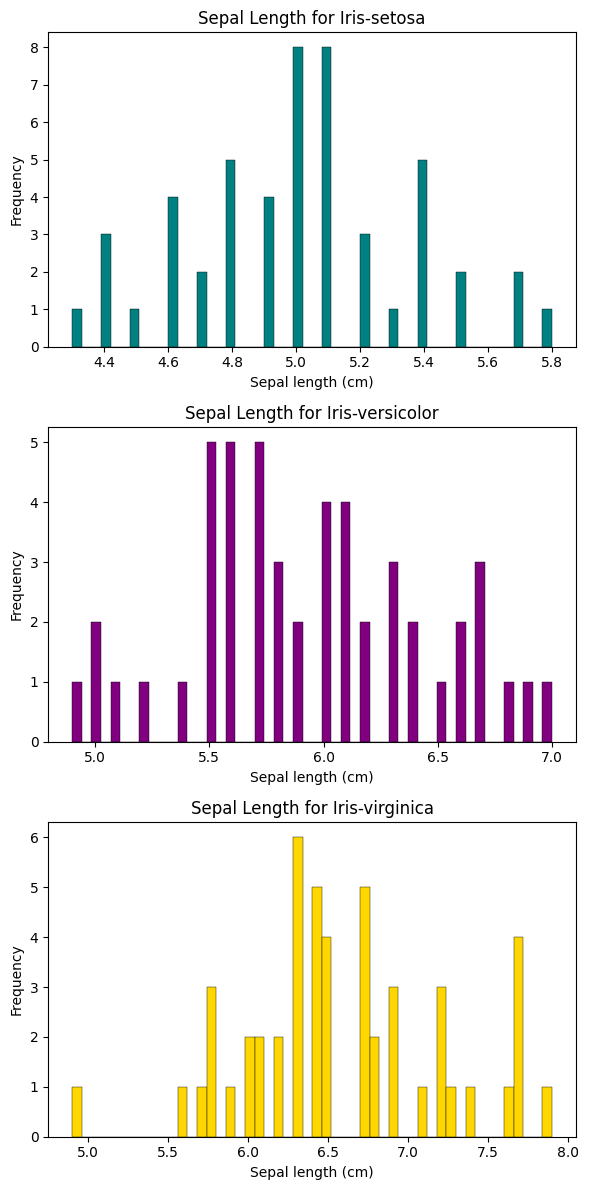

In [20]:
# Sepal Length Histograms with thin lines
plt.figure(figsize=(6, 12))

plt.subplot(3, 1, 1)
plt.hist(setosa['SepalLengthCm'], bins=50, color='teal', edgecolor='black', linewidth=0.3)
plt.title('Sepal Length for Iris-setosa')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Frequency')

plt.subplot(3, 1, 2)
plt.hist(versicolor['SepalLengthCm'], bins=50, color='purple', edgecolor='black', linewidth=0.3)
plt.title('Sepal Length for Iris-versicolor')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
plt.hist(virginica['SepalLengthCm'], bins=50, color='gold', edgecolor='black', linewidth=0.3)
plt.title('Sepal Length for Iris-virginica')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
